# Part 1: API Pulling, Data Wrangling, and Visualizations

## Objective
Retrieve daily Treasury yield data from FRED, calculate bond spreads over the Treasury curve, and create visualizations.

## Steps

### 1. API Registration
Go to [FRED API Documentation](https://fred.stlouisfed.org/docs/api/fred/) and register for a free API Key.

### 2. Data Pulling
Write a Python function to pull daily constant maturity yield data from `2023-01-01` to `2023-12-31` for the following Treasury tenors: 1M, 3M, 6M, 1Y, 2Y, up to 30Y.

- FRED field names for each tenor:
  - **1M**: `"DGS1MO"`
  - **3M**: `"DGS3MO"`
  - **6M**: `"DGS6MO"`
  - **1Y**: `"DGS1"`
  - **2Y**: `"DGS2"`
  - Continue this list up to **30Y** with `"DGS30"`

### 3. Data Storage
Store the pulled data in a DataFrame with `date` as the index.

### 4. Spread Calculation
Load the file `data/Part 1.bond_yields.xlsx`. For each bond:
- Calculate its spread over the Treasury curve.
- If a bond’s WAL (Weighted Average Life) falls between two points on the Treasury curve, use linear interpolation.

### 5. Visualizations
Create at least two types of visualizations to demonstrate the relative value of each sector based on the calculated spreads.

---

## Pseudocode for Implementation

```python
import requests
import pandas as pd

def fetch_fred_yield(series_id, start_date="2023-01-01", end_date="2023-12-31", api_key="your_api_key"):
    # Define the API URL and parameters here
    
    # Make an API request and handle errors
    
    # Convert response JSON into a DataFrame, setting 'date' as index
    # Convert the 'value' column to numeric and rename it based on series_id
    
    return df[[series_id]]  # Final DataFrame with date index and yield column

# List of Treasury yield series IDs on FRED
tenor_series_ids = [
    "DGS1MO", "DGS3MO", "DGS6MO", "DGS1",  # Short-term yields
    "DGS2", "DGS3", "DGS5",               # Medium-term yields
    "DGS7", "DGS10", "DGS20", "DGS30"     # Long-term yields
]

# Initialize API key

# Fetch data for each tenor, store in a dictionary of DataFrames

# Combine all DataFrames into a single DataFrame, joining on the date index

# Print the number of rows in the final DataFrame


In [97]:
import requests
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
%matplotlib inline

In [99]:
def fetch_fred_yield(series_id, start_date="2023-01-01", end_date="2023-12-31", api_key="your_api_key"):
    # Define the API URL and parameters here
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}"

    response = requests.get(url)
    response.raise_for_status()  # This will raise an exception for HTTP errors

    # Convert response JSON into a DataFrame, setting 'date' as index
    data = response.json()['observations']
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    # Convert the 'value' column to numeric and rename it based on series_id
    df[series_id] = pd.to_numeric(df['value'], errors='coerce')

    return df[[series_id]]  # Final DataFrame with date index and yield column

# List of Treasury yield series IDs on FRED
tenor_series_ids = [
    "DGS1MO", "DGS3MO", "DGS6MO", "DGS1",  # Short-term yields
    "DGS2", "DGS3", "DGS5",               # Medium-term yields
    "DGS7", "DGS10", "DGS20", "DGS30"     # Long-term yields
]

api_key = "92af7f08ba8f24bf25c034b0e00b4d3a"


# Fetch data for each tenor, store in a dictionary of DataFrames
yield_data = [fetch_fred_yield(tenor, api_key=api_key) for tenor in tenor_series_ids]


# Combine all DataFrames into a single DataFrame, joining on the date index
yield_df = pd.concat(yield_data, axis=1, join='outer')

yield_df

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
date,,,,,,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,4.17,4.53,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
2023-01-04,4.20,4.55,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2023-01-05,4.30,4.66,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
2023-01-06,4.32,4.67,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,5.53,5.45,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
2023-12-27,5.55,5.44,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95


In [100]:
# Print the number of rows in the final DataFrame
print(f"Total number of rows: {yield_df.shape[0]}")

Total number of rows: 260


4. Spread Calculation
Load the file data/Part 1.bond_yields.xlsx. For each bond:
Calculate its spread over the Treasury curve.
If a bond’s WAL (Weighted Average Life) falls between two points on the Treasury curve, use linear interpolation.
5. Visualizations
Create at least two types of visualizations to demonstrate the relative value of each sector based on the calculated spreads.


In [101]:
spread_df = pd.read_excel('/Users/kyawswaryemyint/Desktop/Code-Assessment/Coding-Assess-main/data/Part 1. bonds_yields.xlsx')
spread_df

,Bond ID,WAL (years),Yield (%),Sector
0,Bond A,1.0,8.63,Telecommunication
1,Bond B,1.5,7.95,Consumer Staples
2,Bond C,2.2,7.53,Utilities
3,Bond D,3.0,7.71,Financials
4,Bond E,4.0,8.45,Telecommunication
5,Bond F,5.0,7.74,Consumer Staples
6,Bond G,6.2,7.66,Utilities
7,Bond H,8.0,8.03,Financials
8,Bond I,9.0,8.33,Telecommunication
9,Bond J,4.5,7.38,Consumer Staples


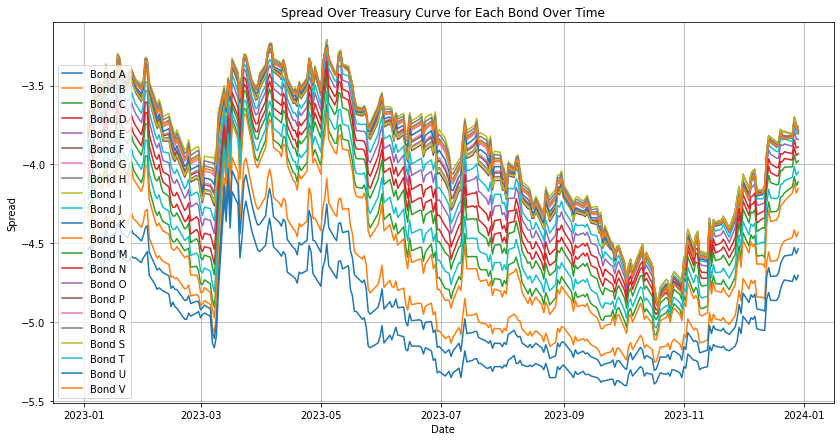

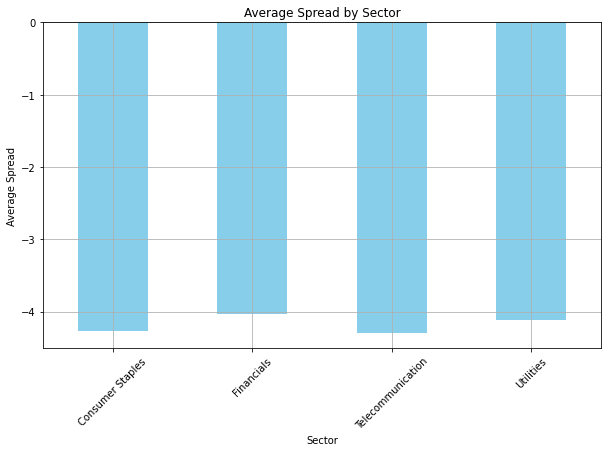

<Figure size 1440x720 with 0 Axes>

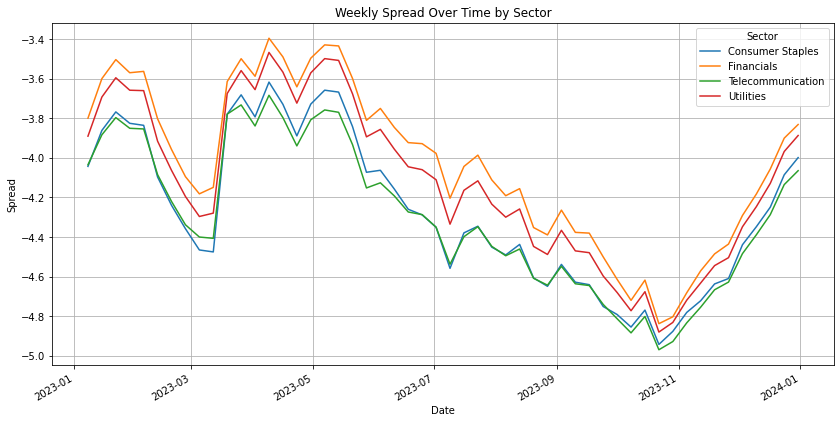

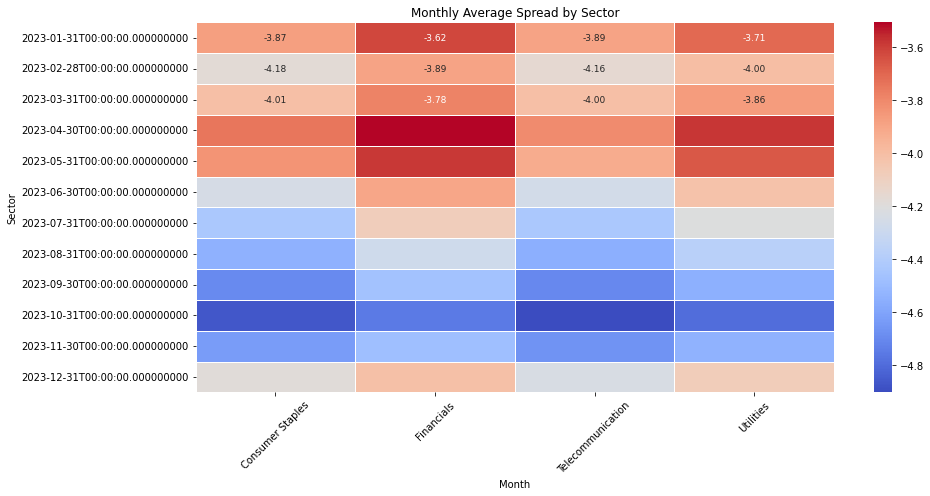

<Figure size 1440x720 with 0 Axes>

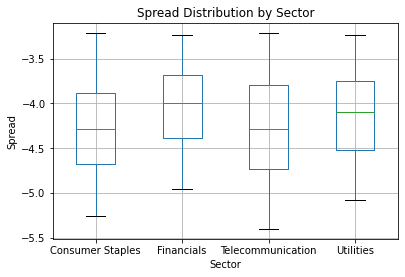

     Bond ID       Date  WAL (years)  Yield (%)  Treasury Yield  Spread
0     Bond A 2023-01-03          1.0       8.63           4.720 -4.6337
1     Bond B 2023-01-03          1.5       7.95           4.560 -4.4805
2     Bond C 2023-01-03          2.2       7.53           4.356 -4.2807
3     Bond D 2023-01-03          3.0       7.71           4.180 -4.1029
4     Bond E 2023-01-03          4.0       8.45           4.060 -3.9755
...      ...        ...          ...        ...             ...     ...
5495  Bond R 2023-12-29          8.5       8.23           3.880 -3.7977
5496  Bond S 2023-12-29          5.2       8.34           3.844 -3.7606
5497  Bond T 2023-12-29          2.5       7.21           4.120 -4.0479
5498  Bond U 2023-12-29          6.8       7.53           3.876 -3.8007
5499  Bond V 2023-12-29          7.8       7.63           3.880 -3.8037

[5500 rows x 6 columns]


In [104]:
dates_to_analyze = yield_df.index

tenors = [1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

results_df = pd.DataFrame()


for date in yield_df.index:
    daily_yields = yield_df.loc[date].fillna(method='ffill').fillna(method='bfill')
    
    if daily_yields.isna().all():
        continue  # Skip days with no available data

    # Calculate spreads and treasury yields for each bond based on WAL
    spread_df['Treasury Yield'] = spread_df['WAL (years)'].apply(lambda wal: np.interp(wal, tenors, daily_yields))
    spread_df['Yield Decimal'] = spread_df['Yield (%)'] / 100
    spread_df['Spread'] = spread_df['Yield Decimal'] - spread_df['Treasury Yield']
    spread_df['Date'] = date
    
    # Join results
    results_df = pd.concat([results_df, spread_df], ignore_index=True)

results_df['Date'] = pd.to_datetime(results_df['Date'])

# Spread Over Treasury Curve for Each Bond Over Time
plt.figure(figsize=(14, 7))
for bond_id in results_df['Bond ID'].unique():
    bond_data = results_df[results_df['Bond ID'] == bond_id]
    plt.plot(bond_data['Date'], bond_data['Spread'], label=bond_id)
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Spread Over Treasury Curve for Each Bond Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Average Spread by Sector Bar Chart
average_spread_by_sector = results_df.groupby('Sector')['Spread'].mean()
average_spread_by_sector.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Sector')
plt.ylabel('Average Spread')
plt.title('Average Spread by Sector')
plt.xticks(rotation=45)
plt.grid(True)
plt.figure(figsize=(20, 10))
plt.show()

# Weekly Spread Over Time by Sector Line Graph
plt.figure(figsize=(14, 7))
for sector, group in results_df.groupby('Sector'):
    weekly_data = group.resample('W', on='Date').mean()
    plt.plot(weekly_data.index, weekly_data['Spread'], label=sector)
plt.title('Weekly Spread Over Time by Sector')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.gcf().autofmt_xdate()
plt.legend(title='Sector')
plt.grid(True)
plt.show()

# Monthly Average Spread by Sector Heatmap
results_df.set_index('Date', inplace=True)
monthly_spreads = results_df.groupby([pd.Grouper(freq='M'), 'Sector'])['Spread'].mean().unstack()
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(monthly_spreads, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 9})
plt.title('Monthly Average Spread by Sector')
plt.xlabel('Month')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Spread Distribution by Sector Boxplot
plt.figure(figsize=(20, 10))
results_df.boxplot(by='Sector', column='Spread', grid=True)
plt.title('Spread Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Spread')
plt.suptitle('')
plt.show()

# Output results with calculated spreads
results_df.reset_index(inplace=True)
print(results_df[['Bond ID', 'Date', 'WAL (years)', 'Yield (%)', 'Treasury Yield', 'Spread']])